In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
sns.set(font_scale=2)

import math
import scipy.stats as stat
from IPython.display import Image

In [1]:
'''Run the following if the notebook is opened using Google Colab'''

if 'google.colab' in str(get_ipython()):    
    print('Running on CoLab')
    
    # mount to drive
    from google.colab import drive
    drive.mount('/content/drive')
    
    # go to project directory
    import os
    root = 'drive/MyDrive/Colab Notebooks/'
    project_dir ='00_data_analysis/00_Probability_and_distributions/Notes/02-Inferential Statistics'
    os.chdir(root+project_dir)
    print(os.getcwd())

else:
    print('Not running on CoLab')

Not running on CoLab


# Distributions

<br>
<div style="background-color: blue; color: white; padding: 20px 20px 20px 20px"> A distribution is a function that shows the possible values for a variable and how often they occur.</div>

- The distribution is not a graph, in fact, it's the rule that determines how values are positioned in relaiton to each other;
- Very often, we use a **histogram** to visualize the data.
- There are many different distributions:
    - Discrete: Discrete uniform, Bernoulli, Binomial, Geometric etc.
    - Continous: Continuous uniform, Normal distribution, Student's T distribution, Exponential etc.


# Normal Distribution
<br>
<div style="background-color: blue; color: white; padding: 20px 20px 20px 20px"> A normally distributed random variable $X$ with mean $\mu$ and standard deviation $\sigma$ is denoted as $X \sim N(\mu, \sigma)$</div>

- $X$ is a **continuous random variable**
- The **Probability Densitiy Function** (PDF) of Normal Distribution is used to draw the probability curve of $X$:
$$\boxed{f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma ^2}}}$$

- It distributes in a **bell shape** histogram with "$\text{mean = median = mode}$"


It's the most important distribution because the distribution of sample sums or sample means tend to **normal** according to **central limit theorem**.



# Standard Normal Distribution 

<br>
<div style="background-color: blue; color: white; padding: 20px 20px 20px 20px">Standard normal distribution is a special case of the normal distribution that has mean $\mu = 0$ and a vairance of $\sigma^2 = 1$. </div>

- The **standard normal distribution** is also called **z-distribution**

- The **probability density function** (PDF) of Standard Normal Distribution is:

$$\boxed{f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}$$

- It is important because we can use it to find <u>probabilities</u> for any **normal random variable** after **standardization**.



## Standardize $x$ to Z-score

Any value of a normal distribution $X \sim N(\mu, \sigma)$ can be standardized to $Z \sim N(0,1)$ by following the following steps:

1. Subtracing mean from an observation ($x$): $\boxed{x-\mu}$, which makes $\mu = 0$

2. Dividing the observation by the standard devaiation: $\boxed{\frac{x-mu}{\sigma}}$, which makes $\sigma = 1$

<br>
<div style="background-color: blue; color: white; padding: 20px 20px 20px 20px">The standardized result of $x$ is called "Z-score", which is also referred to as "normal score" or "standard score".
    
The "Z-score" indicates how far away the observation ($x$) is from the mean of the set of data ($\mu$) in terms of "the number of $\sigma$"</div>

$$\boxed{z = \frac{x-mu}{\sigma}}$$

For example, in a recent SAT exam, the mean of the total scores was 900 with a standard deviation of 260:

- if you score 1200, $z = \frac{1200-900}{260} \approx 1.154$, then your score was 1.154$\sigma$ above the mean. 

- if you score 880, $z= \frac{880-900}{260} \approx -0.077$, then your score was 0.077$\sigma$ below the mean. 


<div style="background-color: gray; color: white; padding: 20px 20px 20px 20px">Characteristics of Z-scores:</div>

- The score sign can be $\pm$;
- For normal or closely normal data, a common application of **Z-score** for identifying potential outliers is for any **Z-score** that are beyond $\pm3$;
- Maximum possible **Z-score** for a set of data is:
    $$\boxed{\text{Max}(Z)= \frac{n-1}{\sqrt{n}}}$$
    


    
## From Z-score to Probability
<br>
<div style="background-color: blue; color: white; padding: 20px 20px 20px 20px">
With Z-score, we can use the <b>cumulative probability function (CDF)</b> of standard normal distribution $Z$, denoted as $\phi$ ("phi"), to calculate the cumulative probability of $P(Z\leq z)$

Therefore, if we have a normal distribution $X$ and we'd like to know $P(X\leq x)$:
<ul>
<li>first, standardize $x$ to Z-score
<li>then, calculate the corresponding $\phi(z)$
</ul>
    
</div>


$$\boxed{\phi(z) = P(Z\leq z) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^z e^{-t^2/2}dt}$$

### Plotting PDF and CDF of Z

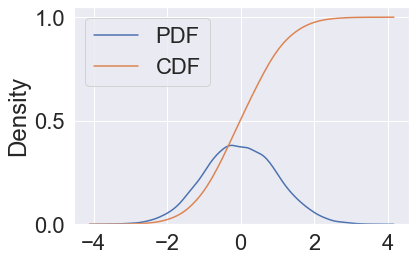

In [159]:
# Random samples from standard normal distribution
n = 10000
z_dist = stat.norm(loc=0, scale=1)
rvs = z_dist.rvs(size=n)

# plot the PDF and CDF of z dist
sns.kdeplot(rvs, label='PDF')
sns.kdeplot(rvs, cumulative=True, label='CDF')
plt.legend()
plt.show()

### Calculate CDF and Z score Inversely (1-tailed)

cdf: 0.302 | this is the cdf where all z values <= -0.52
z-score: -0.519 | this is the z-score where the cdf is 0.302


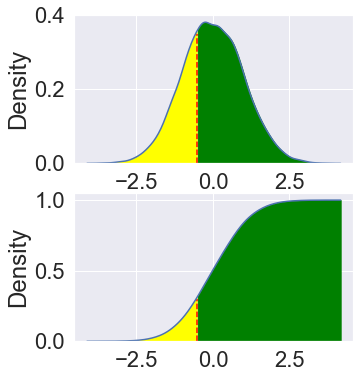

In [212]:
# calculate CDF of P(X<=x) with a z-score
z = -.52
p = round(z_dist.cdf(z),3)
print(f'cdf: {p} | this is the cdf where all z values <= {z}')

# or, calculate the z-score for a desired CDF inversely
z = round(stat.norm.ppf(p),3)
print(f'z-score: {z} | this is the z-score where the cdf is {p}')

# Visualization
fig, axes = plt.subplots(2, figsize=(5,6))

## the probability under the standard normal PDF curve
points = sns.kdeplot(rvs, ax=axes[0]).get_lines()[0].get_data()
x,y = points[0], points[1]
axes[0].fill_between(x, y, where=x<=z, color='yellow')
axes[0].fill_between(x, y, where=x>=z, color='green')
axes[0].vlines(z, ymin=0, ymax=z_dist.pdf(z), color='red', linestyle='--')

## the probability under standard CDF curve
points = sns.kdeplot(rvs, cumulative=True, ax=axes[1]).get_lines()[0].get_data()
x,y = points[0], points[1]
axes[1].fill_between(x, y, where=x<=z, color='yellow')
axes[1].fill_between(x, y, where=x>=z, color='green')
axes[1].vlines(z, ymin=0, ymax=z_dist.cdf(z), color='red', linestyle='--')

plt.show()

### Calculate CDF and Z score Inversely (2-tailed)

cdf: 0.95 | this is the cdf where all z values are between -1.96 and 1.96
z-score: -1.96 and 1.96 | this is the z-score where the cdf is 0.95


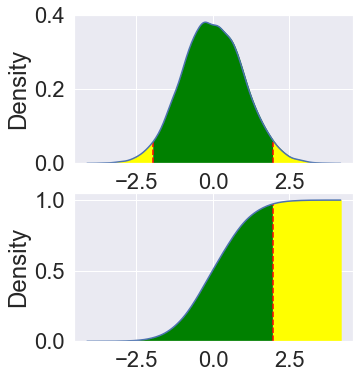

In [211]:
# calculate CDF of P(X >= -x) and P(X <=x) with a z-score (z)
# since this concerns the probability area surrounding the mean with 2-tails
# we are to calculate the CDF between -z and z
z = 1.96
p = round(z_dist.cdf(z),3)-round(z_dist.cdf(-z),3)
print(f'cdf: {p} | this is the cdf where all z values are between {-z} and {z}')

# or, calculate the z-score for a desired CDF inversely
alpha = 1-p
z = round(stat.norm.ppf(alpha/2),3)
print(f'z-score: {z} and {-z} | this is the z-score where the cdf is {p}')

# Visualization
fig, axes = plt.subplots(2, figsize=(5,6))

## the probability under the standard normal PDF curve
points = sns.kdeplot(rvs, ax=axes[0]).get_lines()[0].get_data()
x,y = points[0], points[1]
axes[0].fill_between(x, y, where=x<=z, color='yellow')
axes[0].fill_between(x, y, where=x>=z, color='green')
axes[0].fill_between(x, y, where=x>=-z, color='yellow')
axes[0].vlines(z, ymin=0, ymax=z_dist.pdf(z), color='red', linestyle='--')
axes[0].vlines(-z, ymin=0, ymax=z_dist.pdf(z), color='red', linestyle='--')

## the probability under standard CDF curve
points = sns.kdeplot(rvs, cumulative=True, ax=axes[1]).get_lines()[0].get_data()
x,y = points[0], points[1]
axes[1].fill_between(x, y, where=x<=-z, color='green')
axes[1].fill_between(x, y, where=x>=-z, color='yellow')
axes[1].vlines(-z, ymin=0, ymax=z_dist.cdf(-z), color='red', linestyle='--')

plt.show()

### Standard Normal Z-Table

The CDF formula requires heavy computation to get a precise enough result, the smaller $dx$ is, the more precise, however, which requires heavier computation. Nowadays, with the modern computerized statistical software, it's easy to do such computation. However, in the old days, researchers used the [z - standard normal table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf) to find the approximate CDF of a z-score.

##### Example

Take a SAT score example, where your score was 1200 and $Z = 1.154$. The probability in the table is between $.87493$ and $.87698$, the middle value is $.875$. That is, the probability of having other scores lower than 1200 is approximately $.875$; or you can think of your score being in the $87.5\text{th}$ percentile.

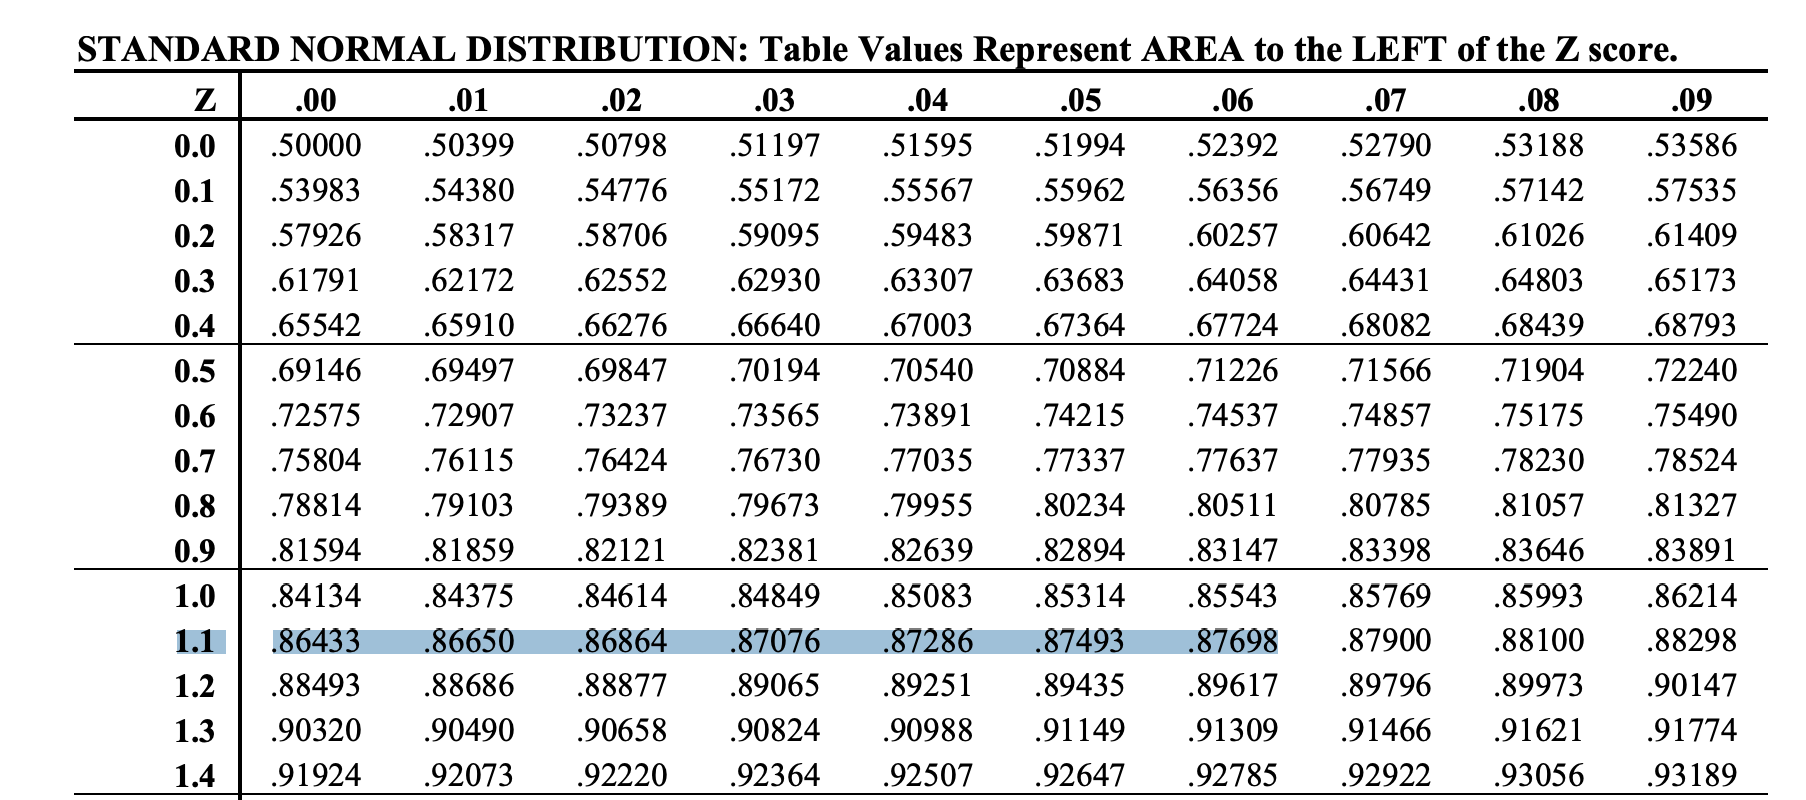

In [213]:
Image('../img/z-score-table-1.png', width=800)

# The Probability Rule


## Empirical Rule for Normal Data

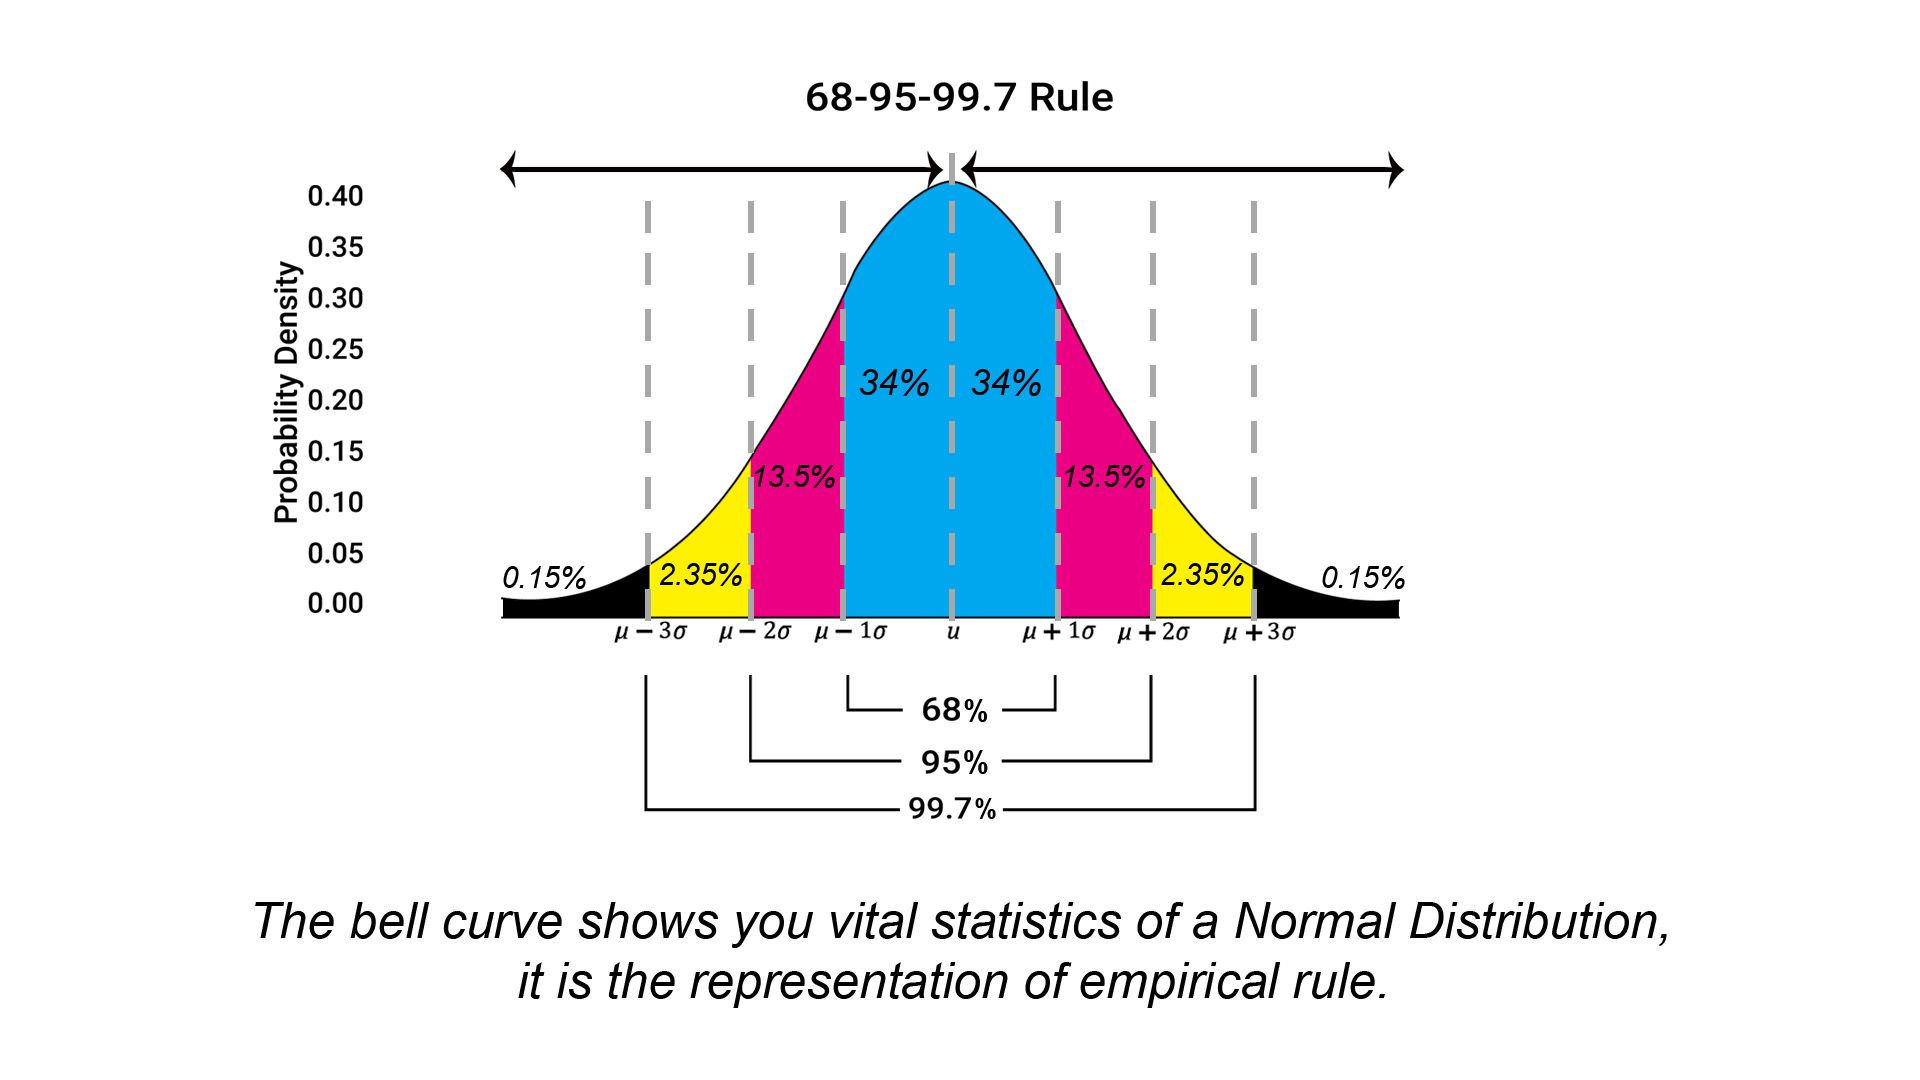

In [103]:
Image('../img/normal-distribution-curve.png', width=800)

## Chebychev's Rule for Any Data

**Chebyshev’s Theorem** can apply to <u>any dataset</u>. But if the data is normal, we shall use **Empirical rule** instead. 

**Chebyshev's Theorem** says the portion of any dataset lying within $k$ standard deviations of the mean is <u>at least</u>:
$$\boxed{1−(\frac{1}{k^2})\text{ where }k>1}$$

- For example, if $k=2$, the proportion of data that lies within <u>2 $\sigma$ of the mean</u> is at least  $1-\frac{1}{2^2}=\frac{3}{4}=75\%$.
- As shown in the figure below, it's the area between $\mu-2\sigma$ and $\mu+2\sigma$.


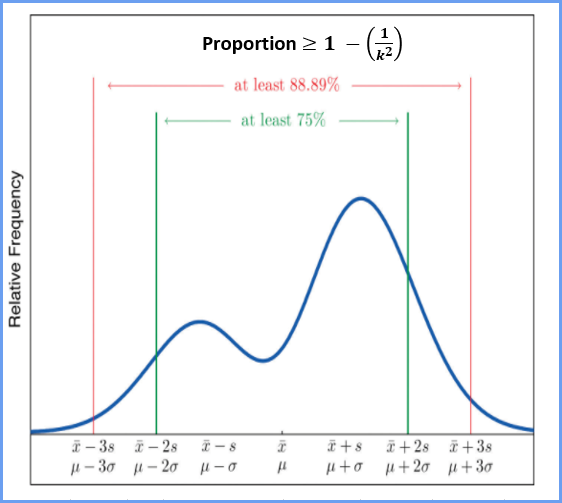

In [13]:
Image('../img/Chebyshevs-rule.png', width=300)

Sometimes, we are asked to <u>find the minimum percentage of data that will be within two values</u> ($x_1$ and $x_2$), which are equally distant from the mean. So we have:

- $x_1 = \mu - k\sigma$ and $x_2 = \mu + k\sigma$, as they are equally distant from the mean, we just use one of the value to calculate $k$
- $k = \frac{x_1-\mu}{\sigma}$
- then we use **chebyshev's theorem** equation to calculate the minimum percentage of the data that will be within $k$ sigma of the mean.

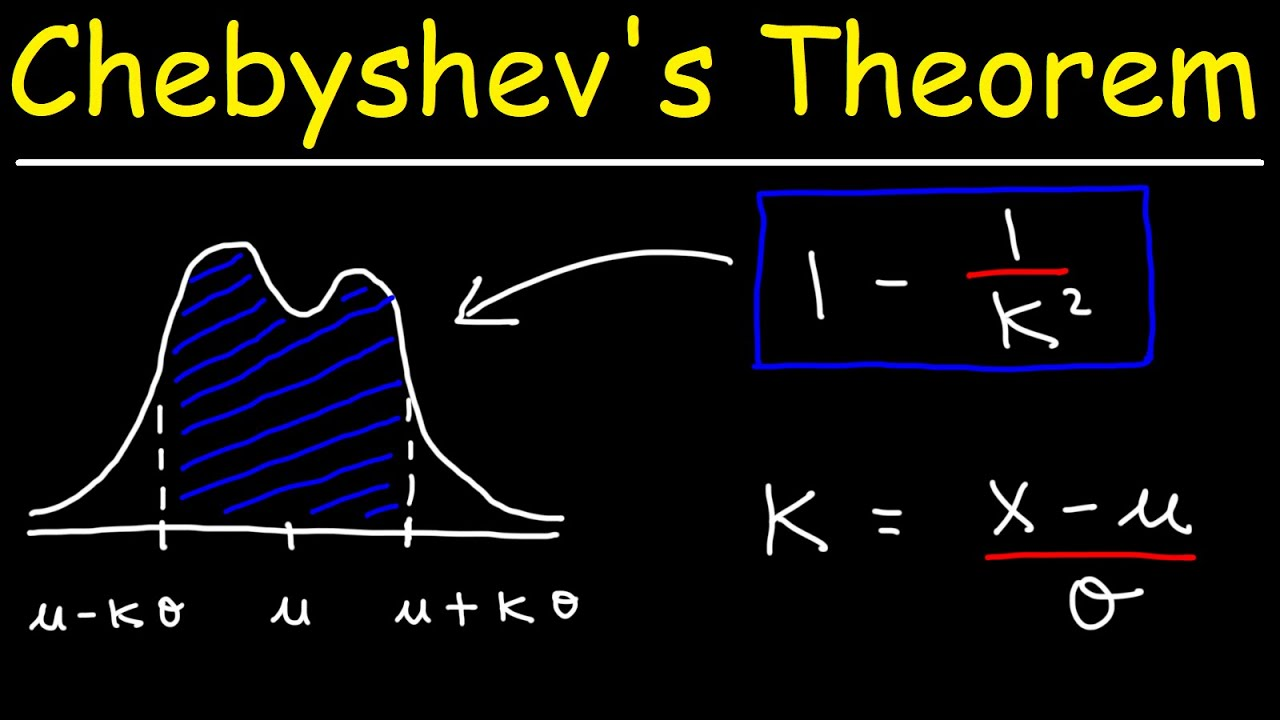

In [14]:
Image('../img/chebyshevs-rule-k.jpeg', width=300)

## Empirical vs Chebychev's

**Emperial Rule** and **Chebyshev's Rule** help to estimate the probability of observing a range of values on a distribution quickly with reference to the number of **standard deviations** away from the **mean**. 

- However, **Emperial Rule** applies to **normal data** only; while **Chebyshev's Rule** apply to any data distribution. 

- Note that both rules hold for **population** and **samples** (the bigger sample size, the better).

|Chebyshev's Rule|Empirical Rule|Interval (population)|Interval (sample)|
|:---|:---|:---:|:---:|
|Any dataset<br>(no matter what distribution)|Bell-shaped and symmetric<br>(Normal Distribution, T-distribution)|||
|At least 0% of the data|Approximately 68% of the data|$$\mu\pm1\sigma$$|$$\bar{x}\pm1s$$|
|At least 75% of the data|Approximately 95% of the data|$$\mu\pm2\sigma$$|$$\bar{x}\pm2s$$|
|At least 89% of the data|More than 99% of the data|$$\mu\pm3\sigma$$|$$\bar{x}\pm3s$$|
|At least 95% of the data|Almost 100%|$$\mu\pm4.5\sigma$$|$$\bar{x}\pm4.5s$$||



# References


https://online.stat.psu.edu/stat500/lesson/3/3.3/3.3.3